<a href="https://colab.research.google.com/github/Kolbanova/VKR_MGTU/blob/main/VKR_Kolbanova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,  SGDRegressor, BayesianRidge  
from sklearn.model_selection import cross_validate, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка исходных данных

In [3]:
df1 = pd.read_excel('/content/drive/MyDrive/VKR/X_bp_exp.xlsx', sheet_name='X_bp.csv', index_col=0)
df1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,2.587348,1953.274926,1136.596135,137.627420,22.344534,234.716883,555.893453,80.803222,2587.342983,246.613117
1,2.499918,1942.595777,901.519947,146.252208,23.081757,351.231874,864.725484,76.178075,3705.672523,226.222760
2,2.046471,2037.631811,707.570887,101.617251,23.146393,312.307205,547.601219,73.817067,2624.026407,178.198556
3,1.856476,2018.220332,836.294382,135.401697,26.435515,327.510377,150.961449,77.210762,2473.187195,123.344561
4,3.305535,1917.907506,478.286247,105.786930,17.874100,328.154579,526.692159,72.345709,3059.032991,275.575880
...,...,...,...,...,...,...,...,...,...,...
995,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
996,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
997,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
998,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [4]:
df2 = pd.read_excel('/content/drive/MyDrive/VKR/X_nup_exp.xlsx', sheet_name='X_nup.csv', index_col=0)
df2.head(20)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,7.856167,64.301964
1,0,7.401543,19.250533
2,0,6.675780,78.623299
3,0,7.526398,38.176975
4,0,8.325699,46.045428
5,0,7.656211,33.571024
6,0,10.302945,39.234280
7,0,8.946891,72.084594
8,0,3.746625,57.997772
9,0,9.094364,44.801601


все три признака, представленные в датасете df2 по первым 19 значениям можно расценивать как дискретные, что вполне оправдано для представленных категорий, однако в диапазоне от 20 и до 1022 данные в колонках "Плотность нашивки" и "Шаг нашивки" представлены непрерывными значениями.
Выдвинем гипотезу о том, что данные в диапазоне (20; 1022) были подвергнуты преобразованию.


Объединение данных в один датафрейм

In [5]:
df = df1.join(df2,  how='inner')
df.head(20)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2.587348,1953.274926,1136.596135,137.627420,22.344534,234.716883,555.893453,80.803222,2587.342983,246.613117,0,7.856167,64.301964
1,2.499918,1942.595777,901.519947,146.252208,23.081757,351.231874,864.725484,76.178075,3705.672523,226.222760,0,7.401543,19.250533
2,2.046471,2037.631811,707.570887,101.617251,23.146393,312.307205,547.601219,73.817067,2624.026407,178.198556,0,6.675780,78.623299
3,1.856476,2018.220332,836.294382,135.401697,26.435515,327.510377,150.961449,77.210762,2473.187195,123.344561,0,7.526398,38.176975
4,3.305535,1917.907506,478.286247,105.786930,17.874100,328.154579,526.692159,72.345709,3059.032991,275.575880,0,8.325699,46.045428
5,2.709554,1892.071124,641.052549,96.563293,22.989291,262.956722,804.592621,74.511359,2288.967377,126.816339,0,7.656211,33.571024
6,2.282825,2008.357592,393.967325,149.372832,21.661751,330.498641,535.371459,72.244924,2704.445081,261.077072,0,10.302945,39.234280
7,1.978140,1973.629097,991.724095,149.372128,19.750578,232.058191,485.453778,75.665701,2448.943079,162.493694,0,8.946891,72.084594
8,1.771436,1872.491560,801.033883,79.794548,22.296304,340.736898,864.929184,70.947592,2796.785402,123.356264,0,3.746625,57.997772
9,3.277087,2010.047012,339.550423,67.498993,24.280609,254.949084,117.535234,67.478707,2462.605386,207.018581,0,9.094364,44.801601


Разделим наш датафрейм на два и произведем обучение моделей на двух датафреймах и сопоставим результаты

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1000 non-null   float64
 1   Плотность, кг/м3                      1000 non-null   float64
 2   модуль упругости, ГПа                 1000 non-null   float64
 3   Количество отвердителя, м.%           1000 non-null   float64
 4   Содержание эпоксидных групп,%_2       1000 non-null   float64
 5   Температура вспышки, С_2              1000 non-null   float64
 6   Поверхностная плотность, г/м2         1000 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 8   Прочность при растяжении, МПа         1000 non-null   float64
 9   Потребление смолы, г/м2               1000 non-null   float64
 10  Угол нашивки, град                    1000 non-null   int64  
 11  Шаг нашивки       

In [7]:
# проверяем наличие дубликатов в данных
df.duplicated().sum()

0

In [8]:
# подсчет уникальных значеий по каждому признаку
df.apply(lambda x: x.nunique())

Соотношение матрица-наполнитель         1000
Плотность, кг/м3                        1000
модуль упругости, ГПа                   1000
Количество отвердителя, м.%             1000
Содержание эпоксидных групп,%_2         1000
Температура вспышки, С_2                1000
Поверхностная плотность, г/м2           1000
Модуль упругости при растяжении, ГПа    1000
Прочность при растяжении, МПа           1000
Потребление смолы, г/м2                 1000
Угол нашивки, град                         2
Шаг нашивки                             1000
Плотность нашивки                       1000
dtype: int64

Визуализация входных данных

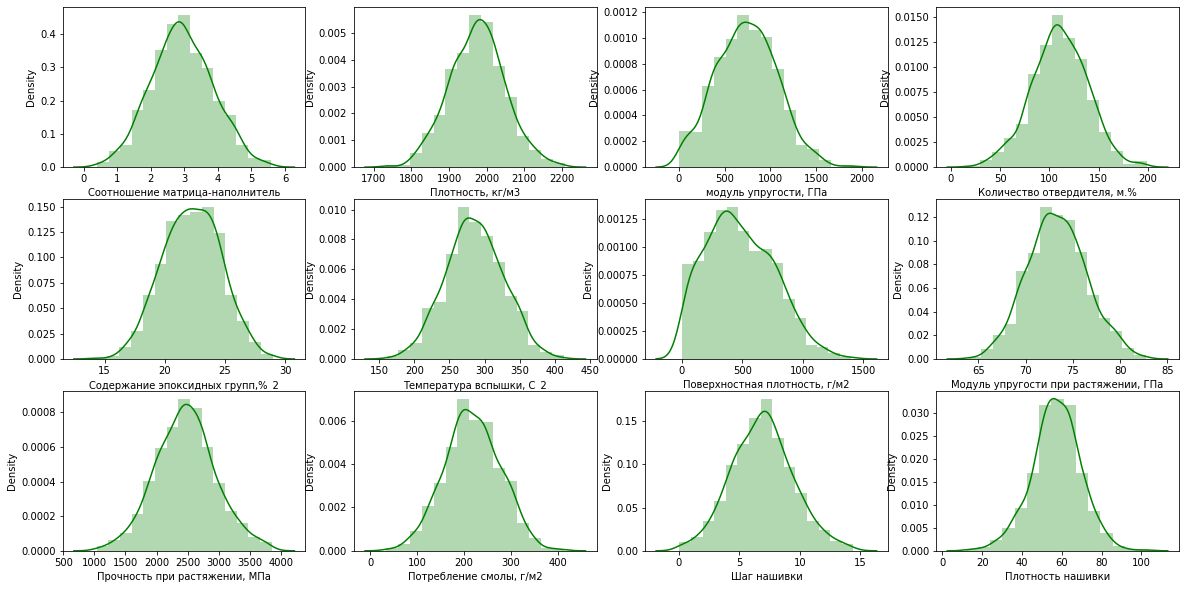

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(3, 4, 1)
sns.distplot(df['Соотношение матрица-наполнитель'],color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 2)
sns.distplot(df['Плотность, кг/м3'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 3)
sns.distplot(df['модуль упругости, ГПа'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 4)
sns.distplot(df['Количество отвердителя, м.%'], color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 5)
sns.distplot(df['Содержание эпоксидных групп,%_2'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 6)
sns.distplot(df['Температура вспышки, С_2'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 7)
sns.distplot(df['Поверхностная плотность, г/м2'], color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 8)
sns.distplot(df['Модуль упругости при растяжении, ГПа'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 9)
sns.distplot(df['Прочность при растяжении, МПа'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 10)
sns.distplot(df['Потребление смолы, г/м2'],color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 11)
sns.distplot(df['Шаг нашивки'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 12)
sns.distplot(df['Плотность нашивки'],color="green",bins=15,hist_kws={'alpha':0.3})

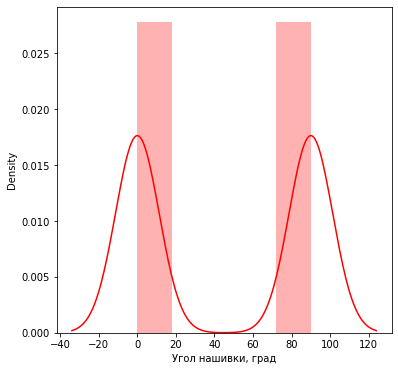

In [10]:
plt.figure(figsize=(6,6))
plt.subplot(1, 1, 1)
sns.distplot(df['Угол нашивки, град'],color="red", hist_kws={'alpha':0.3})

параметр "Угол нашивки" имеет два дискретных значения, которые представлены примерно в равных пропорциях

данные в большинстве своем имеют нормальноео распределение 

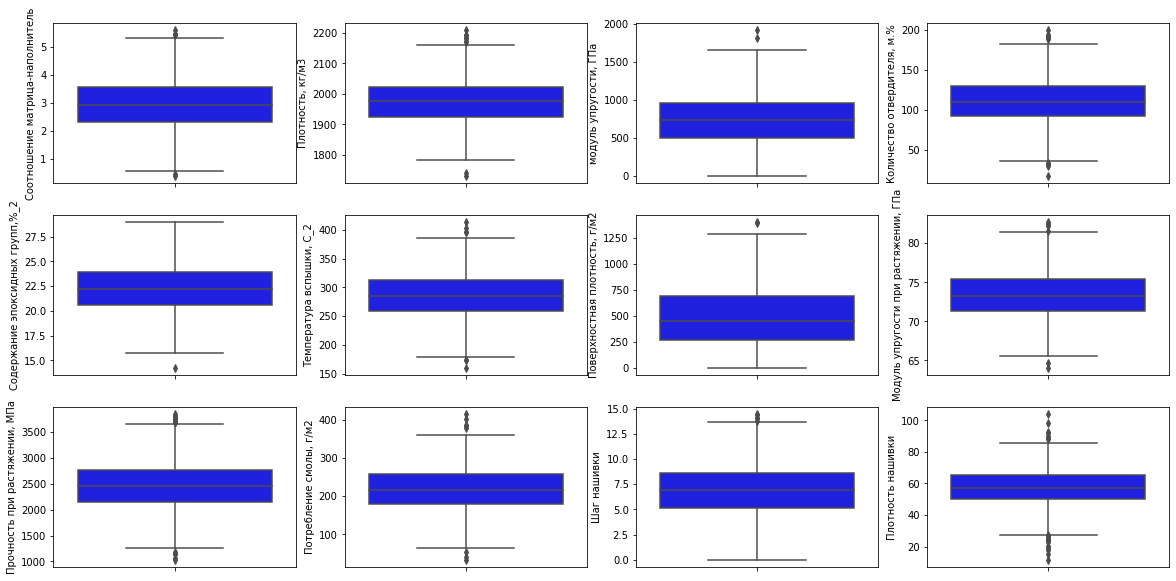

In [11]:
# строим бокспоты (ящики с усами)
plt.figure(figsize=(20,10))
plt.subplot(3, 4, 1)
sns.boxplot(y='Соотношение матрица-наполнитель', data=df, color="blue")
plt.subplot(3, 4, 2)
sns.boxplot(y='Плотность, кг/м3', data=df, color="blue")
plt.subplot(3, 4, 3)
sns.boxplot(y='модуль упругости, ГПа', data=df, color="blue")
plt.subplot(3, 4, 4)
sns.boxplot(y='Количество отвердителя, м.%', data=df, color="blue")
plt.subplot(3, 4, 5)
sns.boxplot(y='Содержание эпоксидных групп,%_2', data=df, color="blue")
plt.subplot(3, 4, 6)
sns.boxplot(y='Температура вспышки, С_2', data=df, color="blue")
plt.subplot(3, 4, 7)
sns.boxplot(y='Поверхностная плотность, г/м2', data=df, color="blue")
plt.subplot(3, 4, 8)
sns.boxplot(y='Модуль упругости при растяжении, ГПа', data=df, color="blue")
plt.subplot(3, 4, 9)
sns.boxplot(y='Прочность при растяжении, МПа', data=df, color="blue")
plt.subplot(3, 4, 10)
sns.boxplot(y='Потребление смолы, г/м2', data=df, color="blue")
plt.subplot(3, 4, 11)
sns.boxplot(y='Шаг нашивки', data=df, color="blue")
plt.subplot(3, 4, 12)
sns.boxplot(y='Плотность нашивки', data=df, color="blue")

Обнаружены выбросы во всех параметрах, наиюольшее количество в колонках "Плотность", "Плотность нашивки", "Потребление смолы" и "Температура вспышки"

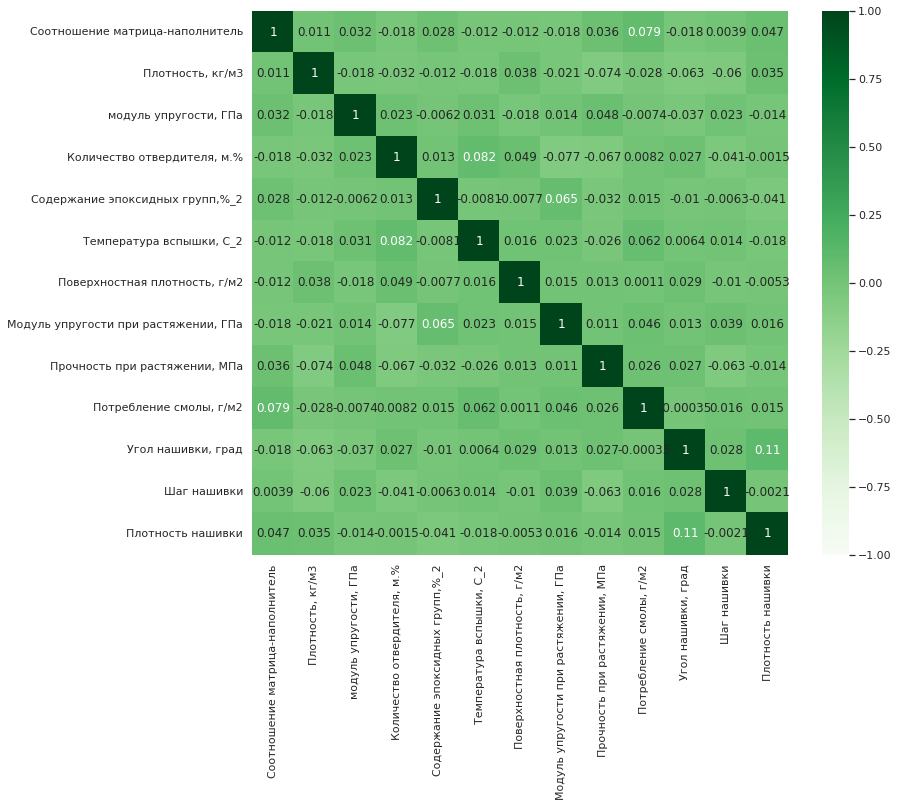

In [12]:
# строим матрицу корреляции
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Greens')

Изучив матрицу корреляции наблюдаем довольно малые значения, что говорит об отсуствии линейной зависимости между признаками. Предположим наличие нелинейной сложной зависимости между признаками

Строим матрицу рассеивания точек

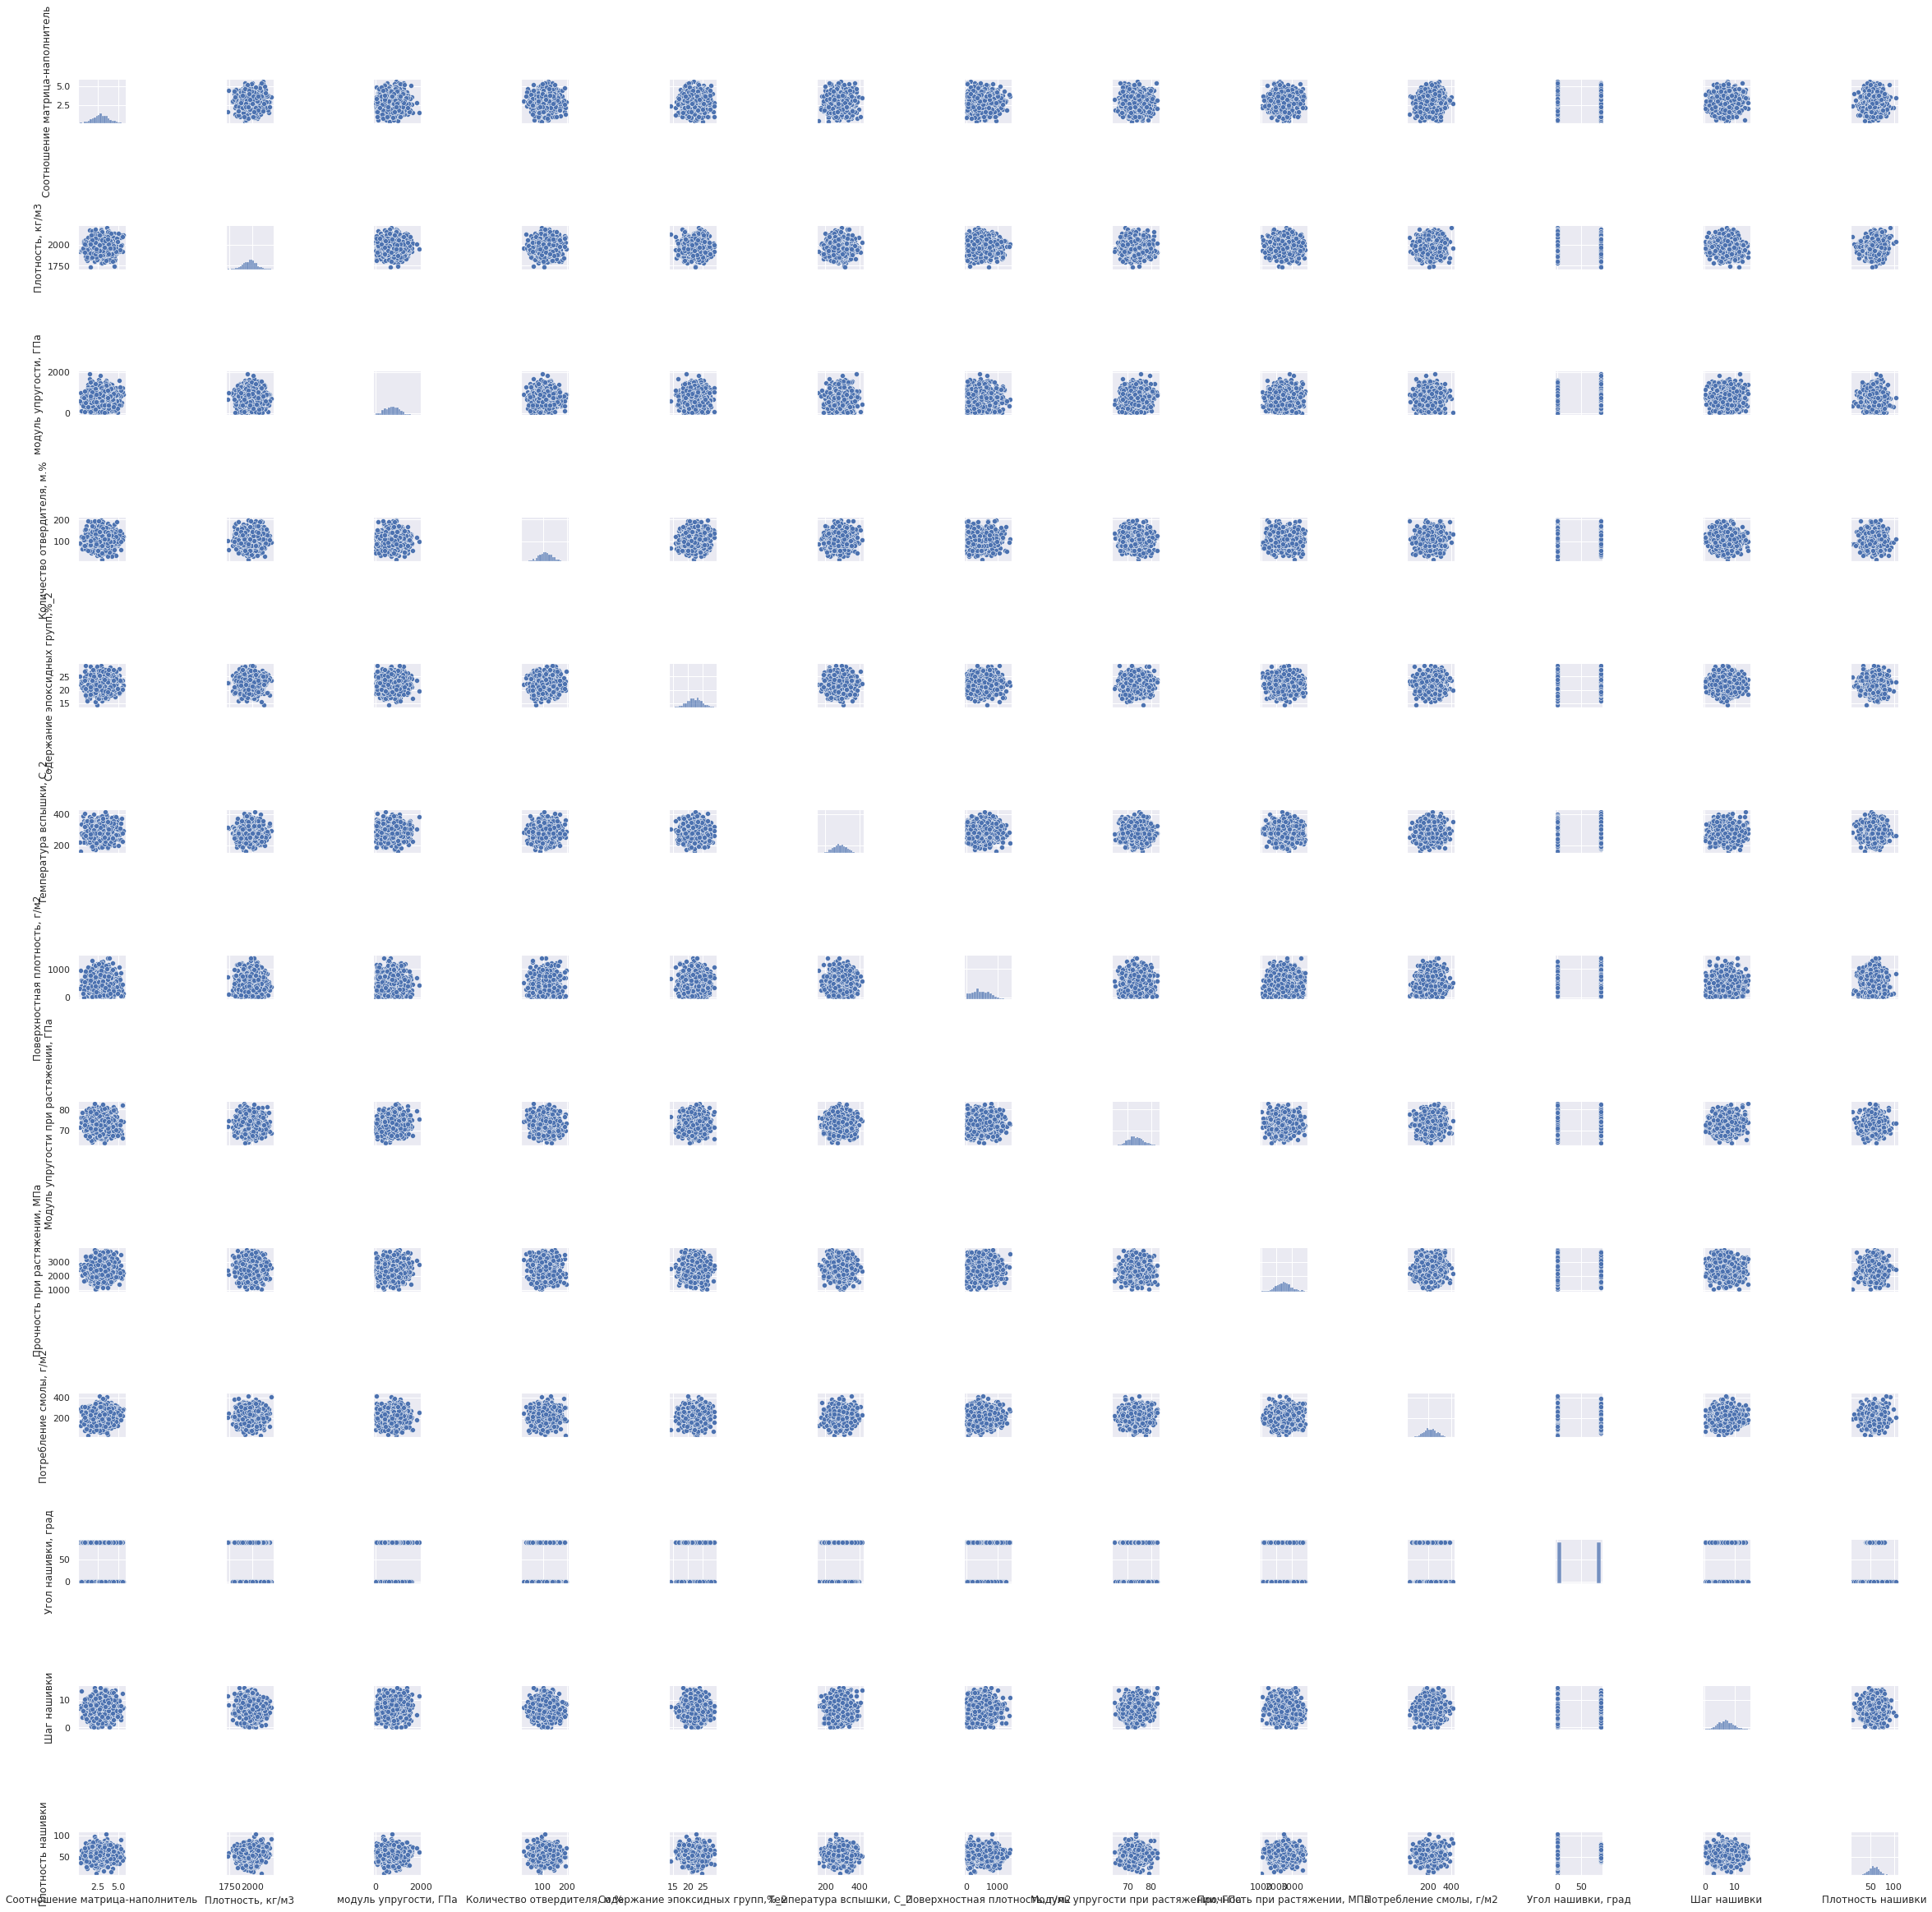

In [13]:
col = df.columns
m_pair_grid = sns.pairplot(df[col])

In [14]:
# проверка наличия пропусков в данных
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков в данных нет, но обнаружены выбросы во всех компонентах (колонках) датасета, кроме Угла нашивки.

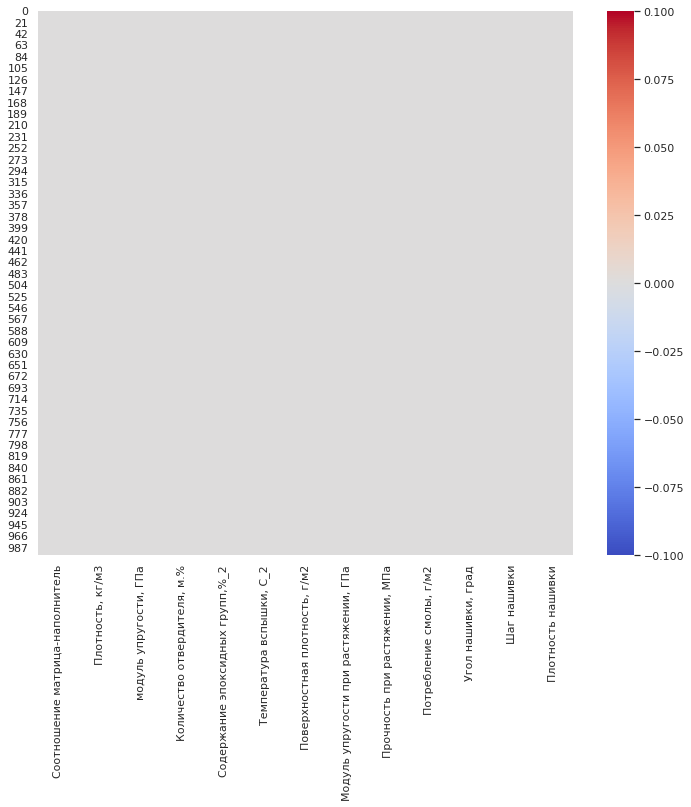

In [15]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

## Удаление выбросов

In [16]:
for col in df.columns:
  quant_3,quant_1 = np.percentile(df.loc[:,col],[75,25])
  iqr = quant_3-quant_1

  max = quant_3+(1.5*iqr)
  min = quant_1-(1.5*iqr)

  df.loc[df[col] < min,col] = np.nan
  df.loc[df[col] > max,col] = np.nan

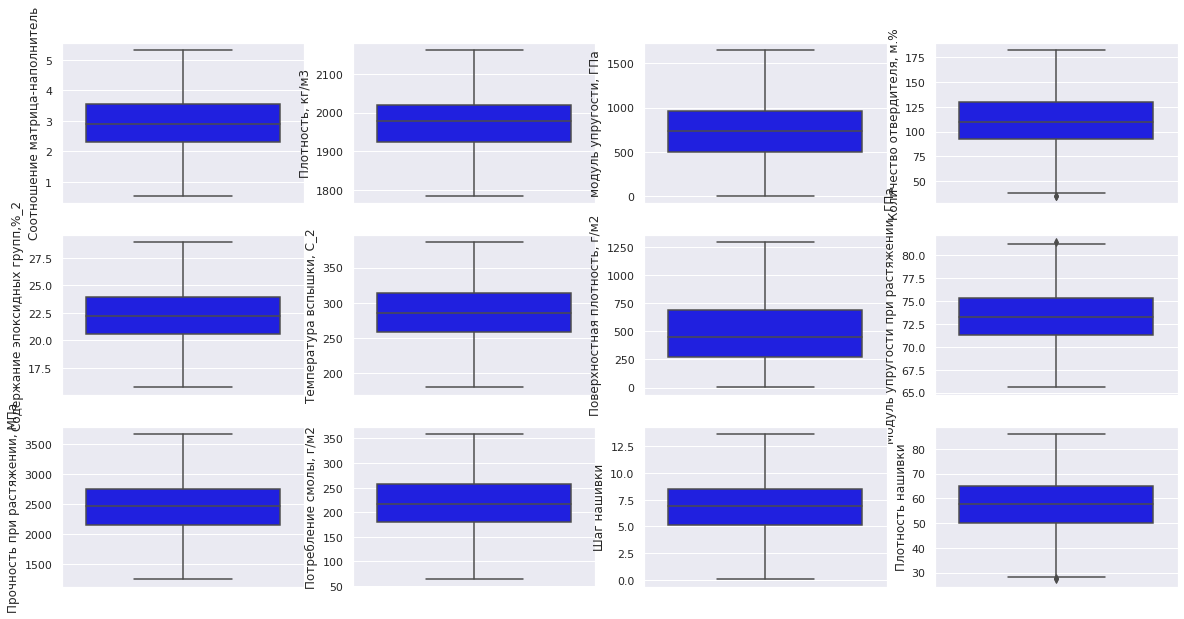

In [17]:
# Построение бокспотов после удаления выбросов
plt.figure(figsize=(20,10))
plt.subplot(3, 4, 1)
sns.boxplot(y='Соотношение матрица-наполнитель', data=df, color="blue")
plt.subplot(3, 4, 2)
sns.boxplot(y='Плотность, кг/м3', data=df, color="blue")
plt.subplot(3, 4, 3)
sns.boxplot(y='модуль упругости, ГПа', data=df, color="blue")
plt.subplot(3, 4, 4)
sns.boxplot(y='Количество отвердителя, м.%', data=df, color="blue")
plt.subplot(3, 4, 5)
sns.boxplot(y='Содержание эпоксидных групп,%_2', data=df, color="blue")
plt.subplot(3, 4, 6)
sns.boxplot(y='Температура вспышки, С_2', data=df, color="blue")
plt.subplot(3, 4, 7)
sns.boxplot(y='Поверхностная плотность, г/м2', data=df, color="blue")
plt.subplot(3, 4, 8)
sns.boxplot(y='Модуль упругости при растяжении, ГПа', data=df, color="blue")
plt.subplot(3, 4, 9)
sns.boxplot(y='Прочность при растяжении, МПа', data=df, color="blue")
plt.subplot(3, 4, 10)
sns.boxplot(y='Потребление смолы, г/м2', data=df, color="blue")
plt.subplot(3, 4, 11)
sns.boxplot(y='Шаг нашивки', data=df, color="blue")
plt.subplot(3, 4, 12)
sns.boxplot(y='Плотность нашивки', data=df, color="blue")

In [18]:
# проверка наличия пропусков
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             11
Содержание эпоксидных групп,%_2          1
Температура вспышки, С_2                 7
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           15
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              5
Плотность нашивки                       20
dtype: int64

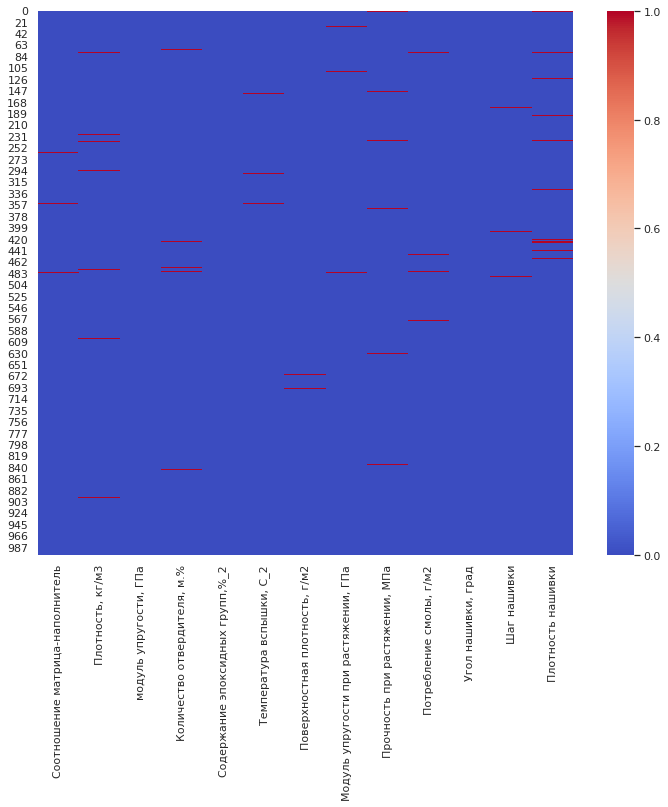

In [19]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

Выбросы устранены, но данные по различным признакам имеют большой разброс. Произведем нормализацию данных для приведения значений признаков к диапазону (0; 1)

In [20]:
# удаление строк с пробелами
df_full = df.dropna()

In [21]:
df_full

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2.587348,1953.274926,1136.596135,137.627420,22.344534,234.716883,555.893453,80.803222,2587.342983,246.613117,0.0,7.856167,64.301964
2,2.046471,2037.631811,707.570887,101.617251,23.146393,312.307205,547.601219,73.817067,2624.026407,178.198556,0.0,6.675780,78.623299
3,1.856476,2018.220332,836.294382,135.401697,26.435515,327.510377,150.961449,77.210762,2473.187195,123.344561,0.0,7.526398,38.176975
4,3.305535,1917.907506,478.286247,105.786930,17.874100,328.154579,526.692159,72.345709,3059.032991,275.575880,0.0,8.325699,46.045428
5,2.709554,1892.071124,641.052549,96.563293,22.989291,262.956722,804.592621,74.511359,2288.967377,126.816339,0.0,7.656211,33.571024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,8.088111,47.759177
996,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,7.619138,66.931932
997,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,9.800926,72.858286
998,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,10.079859,65.519479


In [22]:
# Нормализация. MinMaxScaler
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df_full), columns=df_full.columns, index=df_full.index)

In [23]:
df_norm.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [24]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,918.0,0.500218,0.188017,0.0,0.375862,0.495394,0.629970,1.0
"Плотность, кг/м3",918.0,0.501459,0.187493,0.0,0.369395,0.509410,0.623503,1.0
"модуль упругости, ГПа",918.0,0.446481,0.199507,0.0,0.301059,0.443588,0.583231,1.0
"Количество отвердителя, м.%",918.0,0.514337,0.185492,0.0,0.389511,0.512824,0.648335,1.0
"Содержание эпоксидных групп,%_2",918.0,0.494241,0.182174,0.0,0.366438,0.492839,0.625870,1.0
"Температура вспышки, С_2",918.0,0.513918,0.193223,0.0,0.382668,0.515157,0.646827,1.0
"Поверхностная плотность, г/м2",918.0,0.374590,0.215935,0.0,0.209220,0.354161,0.538768,1.0
"Модуль упругости при растяжении, ГПа",918.0,0.489073,0.191915,0.0,0.357536,0.485020,0.618502,1.0
"Прочность при растяжении, МПа",918.0,0.501871,0.188411,0.0,0.372515,0.498724,0.622741,1.0
"Потребление смолы, г/м2",918.0,0.521729,0.195728,0.0,0.389276,0.518249,0.654476,1.0


# Построение моделей для целевой переменной "Модуль упругости при растяжении, ГПа"

In [27]:
# Определение факторов и целевых переменных Х и у; разделение датасета на train и test выборку 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score

X = df_norm.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'],
                 axis=1)  
y = df_norm['Модуль упругости при растяжении, ГПа'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

In [28]:
rf_regr = RandomForestRegressor(n_estimators=150)
rfr = rf_regr.fit(X_train, y_train)
display(rf_regr.score(X_train, y_train))
rfr_pred = rf_regr.predict(X_test)
print("mean_absolute_error = ", mean_absolute_error(y_test, rfr_pred))
print("R2_score = ", r2_score(y_test, rfr_pred))
print("Max error = ", max_error(y_test, rfr_pred))
# 1.0


0.856071189581333

mean_absolute_error =  0.16208923979262324
R2_score =  -0.0139950311213759
Max error =  0.5684716772227801


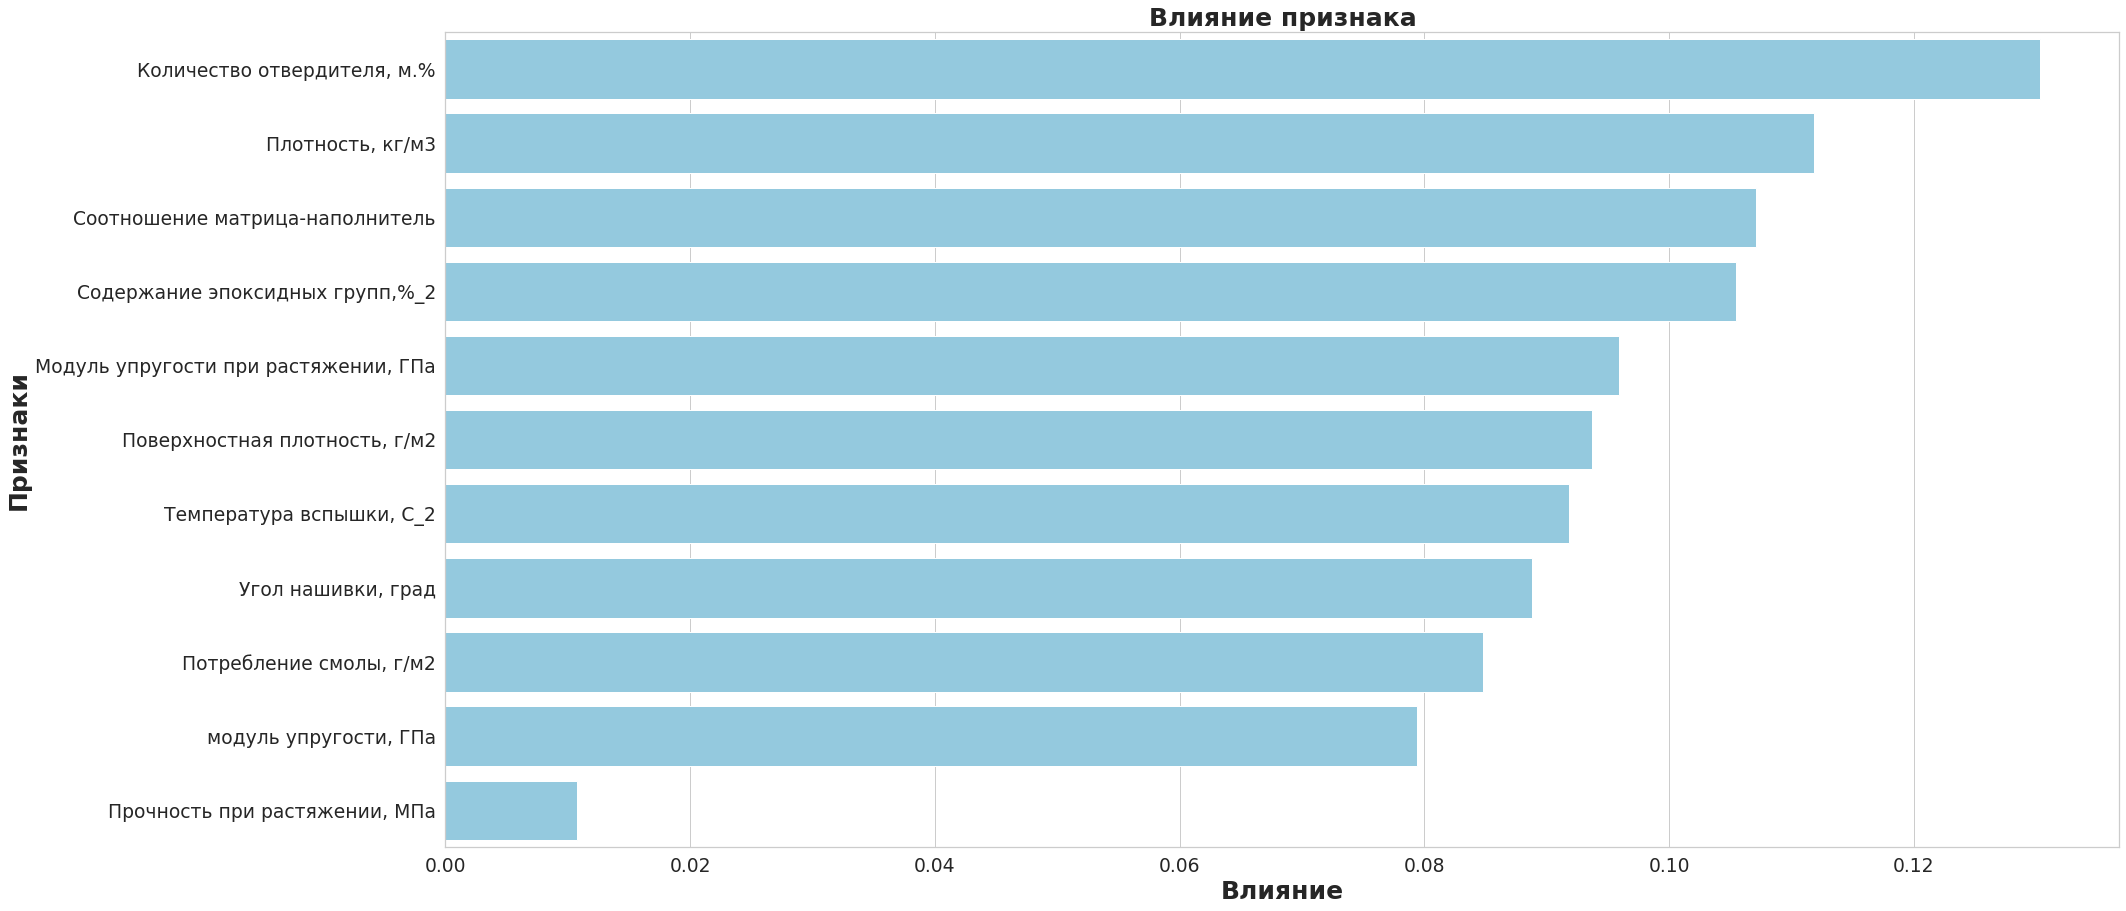

None

,Признаки,Важность
0,"Количество отвердителя, м.%",0.130289
1,"Плотность, кг/м3",0.111873
2,Соотношение матрица-наполнитель,0.107113
3,"Содержание эпоксидных групп,%_2",0.105482
4,"Модуль упругости при растяжении, ГПа",0.095927
5,"Поверхностная плотность, г/м2",0.093712
6,"Температура вспышки, С_2",0.091832
7,"Угол нашивки, град",0.088807
8,"Потребление смолы, г/м2",0.084813
9,"модуль упругости, ГПа",0.079418


In [29]:
# определяем наиболее важные факторы для датасета

data = pd.DataFrame(df_norm, columns = df_norm.columns)
feats = {}
for feature, importance in zip(data.columns, rfr.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Важность'})
importances = importances.sort_values(by='Важность', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Признаки'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Важность'], y=importances['Признаки'], data=importances, color='skyblue')
plt.xlabel('Влияние', fontsize=25, weight = 'bold')
plt.ylabel('Признаки', fontsize=25, weight = 'bold')
plt.title('Влияние признака', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [26]:
# Создаем массив для записи результатов
results = []

Функция обучения и оценки модели

In [27]:
def regression_fit(regressID, X, y, X_v, y_v):
  model = regressID
  model_fit = model.fit(X, y)
  model_score_train = model.score(X, y)
  model_score_test = model.score(X_v, y_v)
  y_pred = model.predict(X_v)
  mae = mean_absolute_error(y_v, y_pred)
  mse = mean_squared_error(y_v, y_pred)
  max_er = max_error(y_v, y_pred)
  r_2 = r2_score(y_v, y_pred)

  print("Train_score = ", model_score_train)
  print("Test_score = ", model_score_test)
  print("mean_absolute_error = ", mae)
  print("mean_squared_error = ", mse)
  print("Max error = ", max_er)
  print("R2_score = ", r_2)
  
  return mae, mse, max_er, r_2


In [28]:
# Функция обучения моделей с использованием кросс-валидации 
def regression_cv(regressID, X, y):
  shuffle_x = ShuffleSplit(n_splits=10, test_size=0.3, random_state=20)
  model_cv = cross_validate(estimator=regressID, X=X, y=y, cv=shuffle_x, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'))
  mae = model_cv['test_neg_mean_absolute_error'].mean()
  mse = model_cv['test_neg_mean_squared_error'].mean()
  r_2 = model_cv['test_r2'].mean()

  print("mean_absolute_error = ", mae)
  print("mean_squared_error = ", mse)
  print("R2_score = ", r_2)
  
  return mae, mse, r_2

Линейная регрессия

In [32]:
regressor1 = LinearRegression()
lr = regression_fit(regressID=regressor1, X=X_train, y=y_train, X_v=X_test, y_v=y_test)
results=np.array(lr)

Train_score =  0.016734039159143954
Test_score =  -0.009053978158942044
mean_absolute_error =  0.16218259794058668
mean_squared_error =  0.039888769700441334
Max error =  0.5049135819474049
R2_score =  -0.009053978158942044


In [33]:

results1 = regression_cv(regressID=regressor1, X=X, y=y)

mean_absolute_error =  -0.1556743390217828
mean_squared_error =  -0.03734906826822779
R2_score =  -0.012656116165534925


In [35]:
regressor2 = Lasso(alpha=0.1)
results2 = regression_cv(regressID=regressor2, X=X, y=y)

mean_absolute_error =  -0.15568916247016593
mean_squared_error =  -0.03707536025565857
R2_score =  -0.004978335437025505


In [36]:
results2

(-0.15568916247016593, -0.03707536025565857, -0.004978335437025505)

In [ ]:
regressor3 = BayesianRidge()
results3 = regression_cv(regressID=regressor3, X=X, y=y)

mean_absolute_error =  -0.15568767482595197
mean_squared_error =  -0.0370756032113741
R2_score =  -0.004986634937216539


In [ ]:
model = LinearRegression()
lin_reg = model.fit(X_train, y_train)
lin_reg_score = model.score(X_train, y_train)
lin_reg_score_test = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print("Train_score = ", lin_reg_score)
print("Test_score = ", lin_reg_score_test)
print("mean_absolute_error = ", mean_absolute_error(y_test, y_pred))
print("mean_squared_error = ", mean_squared_error(y_test, y_pred))
print("R2_score = ", r2_score(y_test, y_pred))
print("Max error = ", max_error(y_test, y_pred))

Train_score =  0.016734039159143954
Test_score =  -0.009053978158942044
mean_absolute_error =  0.16218259794058668
mean_squared_error =  0.039888769700441334
R2_score =  -0.009053978158942044
Max error =  0.5049135819474049


In [ ]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1)
r^2 on test data : -0.000003


In [ ]:
regressor5 = XGBRegressor(max_depth=2, random_state=20)
result5 = regression_cv(regressID=regressor5, X=X, y=y)

[13:32:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [37]:
# 
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rf_regr, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)
rs.best_params_
# {'n_estimators': 700,
# 'min_samples_split': 2,
# 'min_samples_leaf': 2,
# 'max_features': 'log2',
# 'max_depth': 11,
# 'bootstrap': True}

NameError: ignored

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,200,12,50,sqrt,1,False,-0.009911,1
1,800,50,39,log2,1,True,-0.010418,2
2,600,28,2,sqrt,1,False,-0.010834,3
3,400,2,23,log2,1,False,-0.010936,4
4,100,18,12,sqrt,1,False,-0.011709,5
5,400,44,50,log2,10,True,-0.012118,6
6,200,39,44,sqrt,1,True,-0.012171,7
7,200,44,39,sqrt,5,True,-0.012590,8
8,800,18,39,log2,11,True,-0.012682,9
9,100,28,34,log2,8,True,-0.013060,10


In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [300,500,700]
max_features = ['sqrt']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfr, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
rfc = gs.best_estimator_
gs.best_params_
# {'bootstrap': False,
# 'max_depth': 7,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 3,
# 'min_samples_split': 2,
# 'n_estimators': 500}

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


{'bootstrap': False,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 24,
 'n_estimators': 300}

In [ ]:
y_pred = rfr.predict(X_test)
y_pred_pca = rfc.predict(X_test)
y_pred_gs = gs.best_estimator_.predict(X_test)


In [ ]:
print(y_test)
print("R2_score = ", r2_score(y_test, y_pred_pca))
print("Max error = ", max_error(y_test, y_pred_pca))

397    0.641308
371    0.292358
14     0.427912
404    0.736602
225    0.395005
         ...   
501    0.394600
85     0.793629
580    0.277458
248    0.692573
547    0.570844
Name: Модуль упругости при растяжении, ГПа, Length: 276, dtype: float64
R2_score =  0.018441891633694807
Max error =  0.5087467233882704


### Нейронная сеть для параметра "Соотношение Матрица/Наполнитель"

In [31]:
# загружаем бибилиотеки Tenzorflow Keras
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [77]:
# определяем входные и выходной параметры
X = df_norm.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Соотношение матрица-наполнитель'],
                 axis=1)  
y = df_norm['Соотношение матрица-наполнитель'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

In [78]:
X_train = X_train.astype('float32')

In [80]:
norm = tf.keras.layers.Normalization(axis=-1)

In [81]:
X_np = norm.adapt(np.array(X_train))

In [82]:
X_np

In [83]:
y_np = np.array(y_train)
y_np

array([6.66213821e-01, 7.74231184e-01, 4.19591337e-01, 5.98430180e-01,
       8.03909851e-01, 3.62467030e-01, 7.41903986e-01, 8.10843008e-01,
       3.44000303e-01, 3.80554957e-01, 5.04372478e-01, 5.12933780e-01,
       7.14888078e-01, 5.88949093e-01, 3.80239825e-01, 3.81833137e-01,
       4.92098106e-01, 2.62178918e-01, 2.79161688e-01, 3.76899725e-01,
       4.10315394e-01, 4.19591033e-01, 7.55351844e-01, 6.80266101e-01,
       2.75970720e-01, 4.07115256e-01, 8.11400348e-01, 6.44338609e-01,
       7.31270117e-01, 6.82404219e-01, 4.47069168e-01, 5.13134344e-01,
       6.94623158e-01, 4.09364976e-01, 6.37301188e-01, 4.87219538e-01,
       7.04138678e-01, 5.78621255e-01, 5.42660703e-01, 3.89371268e-01,
       8.71066551e-01, 6.56368451e-01, 7.16261554e-01, 5.71982070e-01,
       5.09973227e-01, 8.15184844e-01, 4.74041266e-01, 8.19967455e-01,
       4.21690634e-01, 5.05853935e-01, 5.17952689e-01, 3.89339350e-01,
       9.96160553e-01, 4.64052543e-01, 7.87643039e-01, 5.34751480e-01,
      

In [84]:
# строим модель
model = Sequential(X_np)

model.add(Dense(64))
model.add(Dense(64, activation='selu')) # входной слой 
model.add(Dense(64, activation='selu'))# скрытый слой
model.add(Dense(64, activation='selu')) # скрытый слой
model.add(Dense(64, activation='selu')) # скрытый слой
model.add(Dense(32, activation='selu')) # скрытый слой
model.add(Dense(1))


model.compile(loss = 'mean_absolute_error', 
              optimizer = tf.optimizers.Adam(0.002)) 


In [85]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size=2,
                    epochs = 80,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/80
257/257 [==============================] - 2s 4ms/step - loss: 0.3417 - val_loss: 0.2419
Epoch 2/80
257/257 [==============================] - 1s 3ms/step - loss: 0.2466 - val_loss: 0.1821
Epoch 3/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1888 - val_loss: 0.1717
Epoch 4/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1926 - val_loss: 0.2071
Epoch 5/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1917 - val_loss: 0.2372
Epoch 6/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1741 - val_loss: 0.1610
Epoch 7/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1782 - val_loss: 0.1575
Epoch 8/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1687 - val_loss: 0.1758
Epoch 9/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1673 - val_loss: 0.1686
Epoch 10/80
257/257 [==============================] - 1s 3ms/step - loss: 0.1623 - val_loss: 0.1521

In [86]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                704       
                                                                 
 dense_45 (Dense)            (None, 64)                4160      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_49 (Dense)            (None, 32)                2080      
                                                                 
 dense_50 (Dense)            (None, 1)                

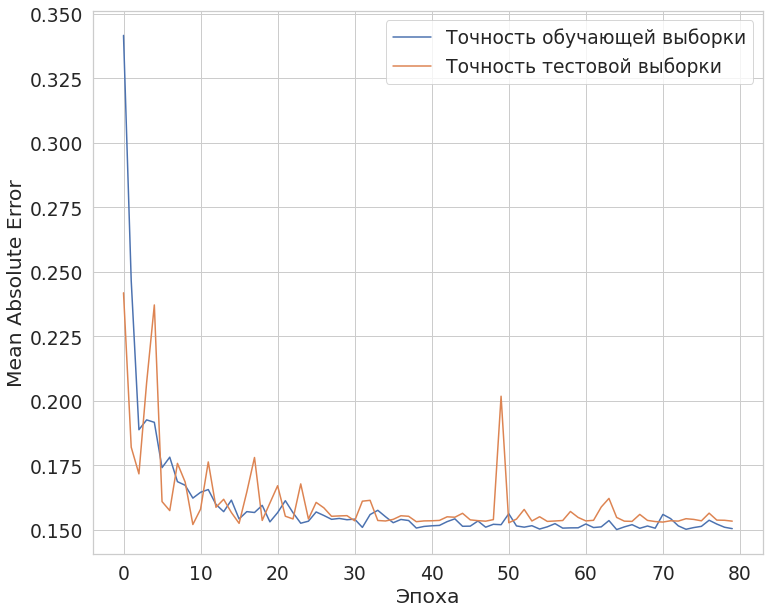

In [87]:
plt.plot(history.history['loss'],
         label = 'Точность обучающей выборки')

plt.plot(history.history['val_loss'],
         label = 'Точность тестовой выборки')
plt.xlabel('Эпоха')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

## Сохранение модели

In [63]:
import pickle

In [65]:
with open('model_nn.pkl', 'wb') as f:
  pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://5c68dc19-ec8c-4f03-bae3-1e2cf75f7063/assets


In [ ]:
model.predict([X])


In [92]:
with open('model_nn.pkl', 'rb') as f:
  load_model = pickle.load(f)

In [93]:
load_model.predict([X])

array([[0.4824924 ],
       [0.48250028],
       [0.48228008],
       [0.4823767 ],
       [0.48212382],
       [0.48230857],
       [0.4827146 ],
       [0.4822189 ],
       [0.48225886],
       [0.48254895],
       [0.48229387],
       [0.4823217 ],
       [0.4823123 ],
       [0.48247024],
       [0.48262048],
       [0.48262963],
       [0.48212582],
       [0.48242426],
       [0.4827277 ],
       [0.48243707],
       [0.48249513],
       [0.48258215],
       [0.48244804],
       [0.48244807],
       [0.48254266],
       [0.48237708],
       [0.48244357],
       [0.48240522],
       [0.48270816],
       [0.48249155],
       [0.48262855],
       [0.48237097],
       [0.48232132],
       [0.48242736],
       [0.4822865 ],
       [0.482431  ],
       [0.48256558],
       [0.4823279 ],
       [0.48234737],
       [0.4825284 ],
       [0.48248148],
       [0.48218426],
       [0.48263764],
       [0.48241165],
       [0.48296285],
       [0.48222214],
       [0.48239094],
       [0.482